<a href="https://colab.research.google.com/github/Mahfooz167/Online_Payment_Fraud_Detection_with_Logistic_Regression_Model_ML_Project/blob/main/Online_Payment_Fraud_Detection_with_Logistic_Regression_Model_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path ='/content/drive/MyDrive/accredian/PS_20174392719_1491204439457_log.csv'

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/accredian/PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df3=df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)
df3.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
df3['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
dummies=pd.get_dummies(df3['type']).drop(['CASH_IN'],axis=1)
dummies

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
6362615,1,0,0,0
6362616,0,0,0,1
6362617,1,0,0,0
6362618,0,0,0,1


In [ ]:
df4=pd.concat([df3,dummies],axis=1).drop(['type'],axis=1)
df4

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Example model


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df4.drop(['isFraud'],axis=1),df4.isFraud,test_size=0.2,random_state=False)

In [ ]:
df4.shape

(6362620, 11)

In [ ]:
X_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1657090,158,99986.73,7845.07,0.00,914025.09,1014011.83,1,0,0,0
3056545,234,62405.63,16603.00,0.00,466525.55,528931.18,1,0,0,0
224722,14,2291393.07,0.00,0.00,3729395.93,6020789.00,0,0,0,1
495935,20,14173.77,11447430.20,11461603.97,3047711.43,3033537.66,0,0,0,0
4412383,322,301264.36,0.00,0.00,806211.40,1107475.76,1,0,0,0


In [ ]:
X_train.shape

(5090096, 10)

In [ ]:
X_test.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
4644207,330,607193.64,15458649.28,16065842.92,3394537.70,2787344.06,0,0,0,0
3800666,281,3473.75,0.00,0.00,0.00,0.00,0,0,1,0
4426240,322,66170.69,32803.00,0.00,0.00,66170.69,1,0,0,0
5788765,401,335384.26,197.00,0.00,5311958.61,5647342.87,0,0,0,1
2010701,180,234392.25,20882.00,255274.25,0.00,0.00,0,0,0,0


In [ ]:
X_test.shape #that is 20% of data

(1272524, 10)

In [ ]:
y_test.head()

4644207    0
3800666    0
4426240    0
5788765    0
2010701    0
Name: isFraud, dtype: int64

In [ ]:
y_test.shape

(1272524,)

In [ ]:
model = LogisticRegression()


In [ ]:
model.fit(X_train,y_train) e care

LogisticRegression()

In [ ]:
model.score(X_test,y_test)#is it posible 90%

0.998257007333457

In [ ]:
df4['isFraud'].unique()

array([0, 1])

In [ ]:
df4.groupby('isFraud').sum() #isFraud o values like step is not fraud and 1's values is fraud like here fraud is 3025783

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,,,,,,
0,1545618400,1.132337e+12,5.292133e+12,5.439183e+12,6.998877e+12,7.783676e+12,2233384,41432,2151495,528812
1,3025783,1.205642e+10,1.354872e+10,1.580121e+09,4.469922e+09,1.051024e+10,4116,0,0,4097


In [ ]:
predict = model.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cm = confusion_matrix(y_test,predict)

<Axes: >

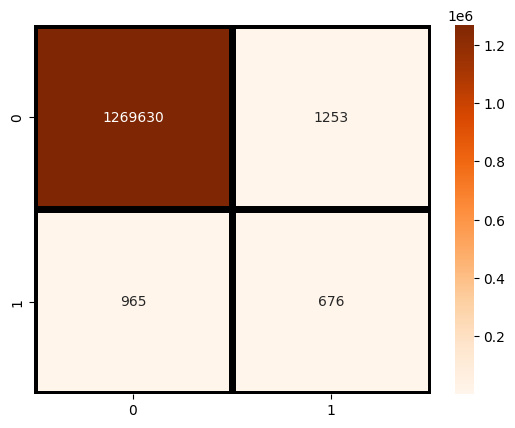

In [ ]:
sns.heatmap(cm,cmap ='Oranges', annot = True , fmt = 'd' , cbar='False' ,linecolor = 'black',linewidths=5)